In [1]:
#Explore the example data
#Build a small convnet from scratch to solve our classification problem
#Evaluate training and validation accuracy
#!wget --no-check-certificate \
 #   https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  #  -O /tmp/cats_and_dogs_filtered.zip
#import requests

#file_url =  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip #\
    #-O /tmp/cats_and_dogs_filtered.zip#"http://codex.cs.yale.edu/avi/db-book/db4/slide-dir/ch1-2.pdf"

#r = requests.get(file_url, stream=True)

#with open("cats_and_dogs_filtered.zip", "wb") as pdf:
 #   for chunk in r.iter_content(chunk_size=1024):
  #      if chunk:
   #         pdf.write(chunk)

In [6]:
import os
import zipfile

local_zip = './tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./tmp')
zip_ref.close()

In [17]:
import os
import zipfile
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
print(train_dir)
#str = "-";
#seq = ("a", "b", "c") # 字符串序列
#print(str.join( seq ))
#a-b-c
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

/tmp/cats_and_dogs_filtered\train


In [18]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [19]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [20]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

24
next_dog_pix ['/tmp/cats_and_dogs_filtered\\train\\dogs\\dog.112.jpg', '/tmp/cats_and_dogs_filtered\\train\\dogs\\dog.113.jpg', '/tmp/cats_and_dogs_filtered\\train\\dogs\\dog.114.jpg', '/tmp/cats_and_dogs_filtered\\train\\dogs\\dog.115.jpg', '/tmp/cats_and_dogs_filtered\\train\\dogs\\dog.116.jpg', '/tmp/cats_and_dogs_filtered\\train\\dogs\\dog.117.jpg', '/tmp/cats_and_dogs_filtered\\train\\dogs\\dog.118.jpg', '/tmp/cats_and_dogs_filtered\\train\\dogs\\dog.119.jpg']


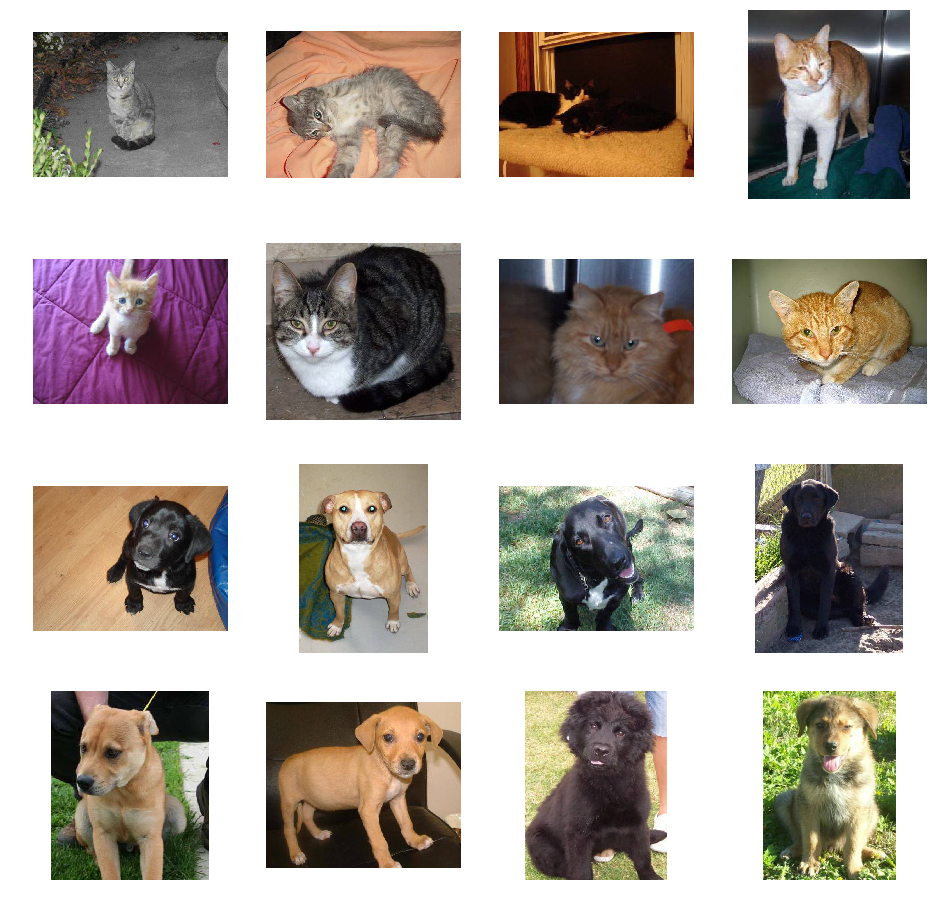

In [24]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
print(pic_index)
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]
print("next_dog_pix",next_dog_pix)
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  #print("i\n",i)
  #print("img_path\n",img_path)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

None


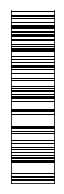

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)
print(np.random.seed(19680801))

# the bar
x = np.where(np.random.rand(500) > 0.7, 1.0, 0.0)# np.where(condition, x, y)满足条件(condition)，输出x，不满足输出y
#print(np.random.rand(500))
axprops = dict(xticks=[], yticks=[])
barprops = dict(aspect='auto', cmap=plt.cm.binary, interpolation='nearest')
#print(x.reshape((-1, 1)))
fig = plt.figure()

# a vertical barcode
ax1 = fig.add_axes([0.1, 0.3, 0.1, 0.6], **axprops)#add_axes(rect, projection=None, polar=False, **kwargs)
ax1.imshow(x.reshape((-1, 1)), **barprops)## 在参数名之前使用2个星号来支持任意多的关键字参数,它是一个dict

# a horizontal barcode
#ax2 = fig.add_axes([0.3, 0.1, 0.6, 0.1], **axprops)
#ax2.imshow(x.reshape((1, -1)), **barprops)


plt.show()

In [25]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [26]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
#keras.layers.Conv1D(filters, kernel_size, strides=1, padding='valid', dilation_rate=1, activation=None,
#use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None,
#bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
#keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, 
#dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
#bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
#kernel_constraint=None, bias_constraint=None)

x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [27]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
__________

In [29]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [31]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/15
 - 93s - loss: 0.7181 - acc: 0.5695 - val_loss: 0.6772 - val_acc: 0.5130
Epoch 2/15
 - 70s - loss: 0.6122 - acc: 0.6840 - val_loss: 0.5902 - val_acc: 0.6800
Epoch 3/15
 - 79s - loss: 0.5377 - acc: 0.7365 - val_loss: 0.6201 - val_acc: 0.6500
Epoch 4/15
 - 76s - loss: 0.4666 - acc: 0.7825 - val_loss: 0.6417 - val_acc: 0.7060
Epoch 5/15
 - 72s - loss: 0.3922 - acc: 0.8125 - val_loss: 0.5753 - val_acc: 0.7390
Epoch 6/15
 - 77s - loss: 0.3124 - acc: 0.8515 - val_loss: 0.6958 - val_acc: 0.7170
Epoch 7/15
 - 85s - loss: 0.2270 - acc: 0.9105 - val_loss: 0.7830 - val_acc: 0.6990
Epoch 8/15
 - 75s - loss: 0.1543 - acc: 0.9400 - val_loss: 0.8316 - val_acc: 0.7240
Epoch 9/15
 - 67s - loss: 0.1187 - acc: 0.9590 - val_loss: 2.0187 - val_acc: 0.6450
Epoch 10/15
 - 66s - loss: 0.0799 - acc: 0.9725 - val_loss: 1.2835 - val_acc: 0.7250
Epoch 11/15
 - 68s - loss: 0.0717 - acc: 0.9765 - val_loss: 1.5451 - val_acc: 0.6840
Epoch 12/15
 - 69s - loss: 0.0724 - acc: 0.9815 - val_loss: 1.2742 - val_a

In [50]:
print(type(history))
print(history.history)

<class 'tensorflow.python.keras.callbacks.History'>
{'val_loss': [0.6771995604038239, 0.5902403044700623, 0.6200854939222336, 0.6417308881878853, 0.5752894634008408, 0.6957651862502098, 0.7830486634373665, 0.8316191554069519, 2.0187466949224473, 1.2834722262620926, 1.5450874990224839, 1.2742024528980256, 1.4823838925361634, 1.394531244635582, 1.5410254245996475], 'val_acc': [0.5129999983310699, 0.6799999988079071, 0.65, 0.705999995470047, 0.7389999985694885, 0.7170000004768372, 0.6989999961853027, 0.7240000009536743, 0.6450000017881393, 0.7249999964237213, 0.6840000003576279, 0.7249999964237213, 0.7139999997615815, 0.735999995470047, 0.7269999992847442], 'loss': [0.7180941641330719, 0.612151749432087, 0.5377411466836929, 0.4665934033691883, 0.39219916686415673, 0.3123991057276726, 0.22700747884809971, 0.1543026455119252, 0.11874190386384725, 0.07989799449685961, 0.07170734795741737, 0.07237562889058609, 0.035224922294728456, 0.04569980295389541, 0.03643317656737054], 'acc': [0.56949999

successive_outputs [<tf.Tensor 'conv2d/Relu:0' shape=(?, 148, 148, 16) dtype=float32>, <tf.Tensor 'max_pooling2d/MaxPool:0' shape=(?, 74, 74, 16) dtype=float32>, <tf.Tensor 'conv2d_1/Relu:0' shape=(?, 72, 72, 32) dtype=float32>, <tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(?, 36, 36, 32) dtype=float32>, <tf.Tensor 'conv2d_2/Relu:0' shape=(?, 34, 34, 64) dtype=float32>, <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(?, 17, 17, 64) dtype=float32>, <tf.Tensor 'flatten/Reshape:0' shape=(?, 18496) dtype=float32>, <tf.Tensor 'dense/Relu:0' shape=(?, 512) dtype=float32>, <tf.Tensor 'dense_1/Sigmoid:0' shape=(?, 1) dtype=float32>]


C:\Users\jinlong\Anaconda2\envs\3point6\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


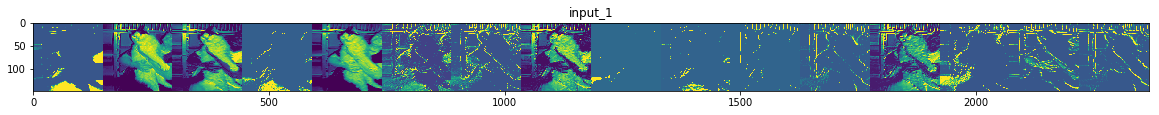

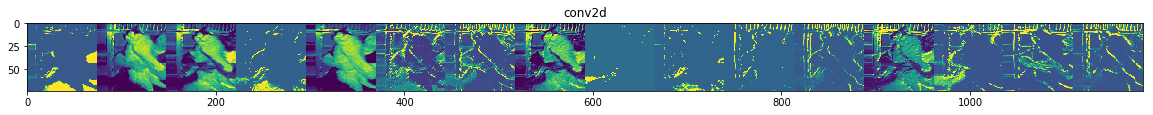

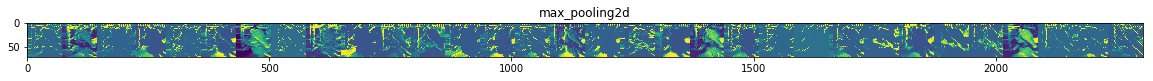

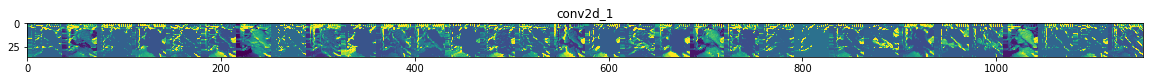

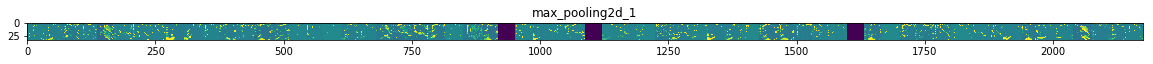

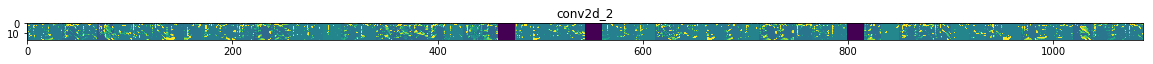

In [66]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
print("successive_outputs",successive_outputs)
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)
#print("successive_feature_maps size:\n",np.size(successive_feature_maps))
# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      #print("x shape:\n",x.shape) (148, 148)
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      #print("x shape:\n",x.shape) (17, 17)   (34, 34) 
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

range(0, 15)


Text(0.5,1,'Training and validation loss')

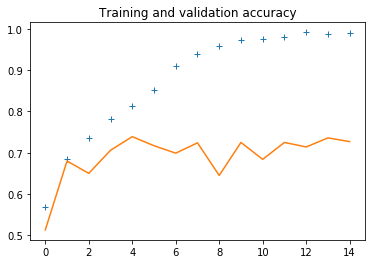

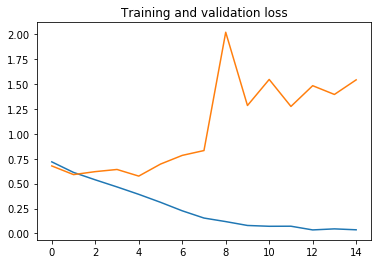

In [54]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))
print(epochs )

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc,"+")
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [53]:
import os
import signal
print(os.getpid())
print(signal)
 
#os.kill(os.getpid(), signal.SIGKILL)

680
<module 'signal' from 'C:\\Users\\jinlong\\Anaconda2\\envs\\3point6\\lib\\signal.py'>


In [67]:
#Explore how data augmentation works by making random transformations to training images.
#Add data augmentation to our data preprocessing.
#Add dropout to the convnet.
#Retrain the model and evaluate loss and accuracy.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,#rotation_range: 整数。随机旋转的度数范围。
      width_shift_range=0.2,#width_shift_range: 浮点数、一维数组或整数
      height_shift_range=0.2,
      shear_range=0.2,#浮点数。剪切强度（以弧度逆时针方向剪切角度）。
      zoom_range=0.2,# 浮点数 或 [lower, upper]。随机缩放范围。如果是浮点数，[lower, upper] = [1-zoom_range, 1+zoom_range]。
      horizontal_flip=True,#布尔值。随机水平翻转。
      fill_mode='nearest')# {"constant", "nearest", "reflect" or "wrap"} 之一

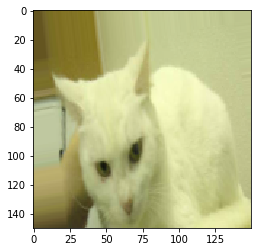

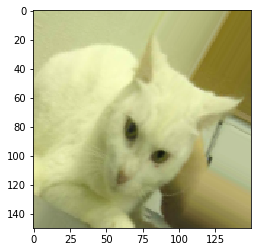

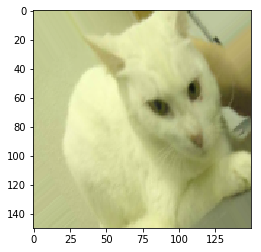

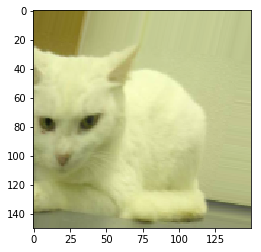

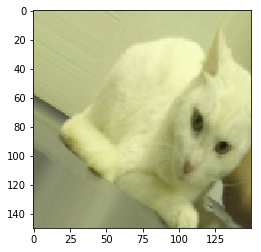

In [88]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img_path = os.path.join(train_cats_dir, train_cat_fnames[35])
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# The .flow() command below generates batches of randomly transformed images
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i % 5 == 0:
    break

In [69]:
# Adding rescale, rotation_range, width_shift_range, height_shift_range,
# shear_range, zoom_range, and horizontal flip to our ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 32 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [70]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model = Model(img_input, output)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [72]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/10
 - 79s - loss: 0.6254 - acc: 0.6675 - val_loss: 0.5932 - val_acc: 0.6910
Epoch 2/10
 - 73s - loss: 0.6231 - acc: 0.6745 - val_loss: 0.5519 - val_acc: 0.7210
Epoch 3/10
 - 75s - loss: 0.6076 - acc: 0.6690 - val_loss: 0.6378 - val_acc: 0.6300
Epoch 4/10
 - 84s - loss: 0.6062 - acc: 0.6770 - val_loss: 0.5803 - val_acc: 0.7060
Epoch 5/10
 - 89s - loss: 0.6004 - acc: 0.6805 - val_loss: 0.5417 - val_acc: 0.7360
Epoch 6/10
 - 95s - loss: 0.5846 - acc: 0.6925 - val_loss: 0.5454 - val_acc: 0.7330
Epoch 7/10
 - 91s - loss: 0.5899 - acc: 0.6940 - val_loss: 0.5388 - val_acc: 0.7410
Epoch 8/10
 - 90s - loss: 0.5929 - acc: 0.7055 - val_loss: 0.5704 - val_acc: 0.6930
Epoch 9/10
 - 94s - loss: 0.5822 - acc: 0.7125 - val_loss: 0.5355 - val_acc: 0.7390
Epoch 10/10
 - 89s - loss: 0.5671 - acc: 0.7165 - val_loss: 0.5390 - val_acc: 0.7210


Text(0.5,1,'Training and validation loss')

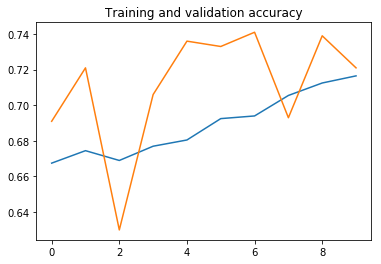

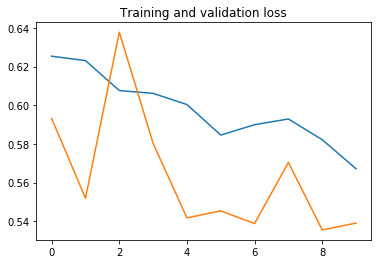

In [73]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [81]:
import tensorflow as tf
s=np.random.uniform(size=(5, 2))
dataset = tf.data.Dataset.from_tensor_slices(s) 
print(dataset)
print(s.shape)
print(s)
#tf.data.Dataset.from_tensor_slices就会切分它形状上的第一个维度，
#最后生成的dataset中一个含有5个元素，每个元素的形状是(2, )，即每个元素是矩阵的一行。

<TensorSliceDataset shapes: (2,), types: tf.float64>
(5, 2)
[[0.73860902 0.02099315]
 [0.15438109 0.32734085]
 [0.74374393 0.16056156]
 [0.14731224 0.91988212]
 [0.68171729 0.51107213]]


In [90]:
#Feature Extraction and Fine-Tuning
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
#!wget --no-check-certificate \
 #   https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
  #  -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = './tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=(150, 150, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

In [91]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [93]:
#The layer we will use for feature extraction in Inception v3 is called mixed7. 
#It is not the bottleneck of the network, but we are using it to keep a sufficiently large feature map (7x7 in this case). 
#(Using the bottleneck layer would have resulting in a 3x3 feature map, 
#which is a bit small.) Let's get the output from mixed7:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 7, 7, 768)


In [94]:
from tensorflow.keras.optimizers import RMSprop
#Now let's stick a fully connected classifier on top of last_output:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

# Configure and compile the model
model = Model(pre_trained_model.input, x)
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0001),
              metrics=['acc'])

In [95]:
import os
import zipfile

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#local_zip = '/tmp/cats_and_dogs_filtered.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('/tmp')
#zip_ref.close()

# Define our example directories and files
base_dir = './tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, n
    zoom_range=0.2,
    horizontal_flip=True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [96]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/2
 - 472s - loss: 0.5021 - acc: 0.7750 - val_loss: 0.2840 - val_acc: 0.9160
Epoch 2/2
 - 417s - loss: 0.3806 - acc: 0.8255 - val_loss: 0.3158 - val_acc: 0.9300


In [97]:
from tensorflow.keras.optimizers import SGD

unfreeze = False

# Unfreeze all models after "mixed6"
for layer in pre_trained_model.layers:
  if unfreeze:
    layer.trainable = True
  if layer.name == 'mixed6':
    unfreeze = True

# As an optimizer, here we will use SGD 
# with a very low learning rate (0.00001)
model.compile(loss='binary_crossentropy',
              optimizer=SGD(
                  lr=0.00001, 
                  momentum=0.9),
              metrics=['acc'])

In [98]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/50
 - 455s - loss: 0.2732 - acc: 0.8740 - val_loss: 0.3053 - val_acc: 0.9340
Epoch 2/50
 - 424s - loss: 0.2623 - acc: 0.8855 - val_loss: 0.3033 - val_acc: 0.9340
Epoch 3/50
 - 422s - loss: 0.2648 - acc: 0.8850 - val_loss: 0.3012 - val_acc: 0.9360
Epoch 4/50


KeyboardInterrupt: 

Text(0.5,1,'Training and validation loss')

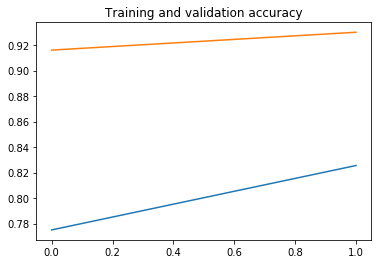

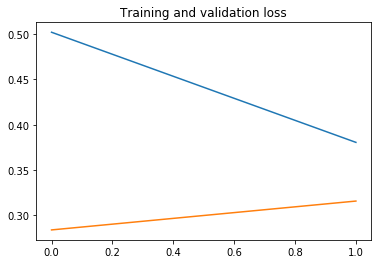

In [99]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')